In [7]:
import datacube

from matplotlib import colors as mcolours
import numpy as np

%matplotlib inline

dc = datacube.Datacube()

In [8]:
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
clean_p,clean_p,clean version,None,None,None
d2m,d2m,test1209,None,None,None
era5_1,era5_1,test1209,None,None,None
era5_2,era5_2,test1209,None,None,None
letsgoooo,letsgoooo,gonnamakeit,None,None,None
prec,prec,test,None,None,None
precp,precp,test,None,None,None


In [9]:
datasets1 = dc.find_datasets(product="letsgoooo")
datasets1

[Dataset <id=232a9116-9e84-4b48-a8af-ebd0a126dfc3 product=letsgoooo location=file:///odctest/letsgoooo/2020/01/01/letsgoooo_2020-01-01.odc-metadata.yaml>,
 Dataset <id=8c901234-5d49-4401-856a-0e52f55741f3 product=letsgoooo location=file:///odctest/letsgoooo/2020/01/02/letsgoooo_2020-01-02.odc-metadata.yaml>,
 Dataset <id=d76a78c5-9dee-47d1-a68d-aa837c46e451 product=letsgoooo location=file:///odctest/letsgoooo/2020/01/03/letsgoooo_2020-01-03.odc-metadata.yaml>,
 Dataset <id=fb1f914c-3bb7-48b1-9521-4a0cf8e15148 product=letsgoooo location=file:///odctest/letsgoooo/2020/01/04/letsgoooo_2020-01-04.odc-metadata.yaml>,
 Dataset <id=adce36c1-9ccb-4333-8220-4e637258e694 product=letsgoooo location=file:///odctest/letsgoooo/2020/01/05/letsgoooo_2020-01-05.odc-metadata.yaml>,
 Dataset <id=a7ea3168-4594-4d9f-8f00-0892a7ae7daa product=letsgoooo location=file:///odctest/letsgoooo/2020/01/06/letsgoooo_2020-01-06.odc-metadata.yaml>,
 Dataset <id=23c3bfc9-b409-4b70-a003-6d76e1c3fd69 product=letsgoooo lo

In [13]:
datasetsNew = dc.find_datasets(
    product="letsgoooo",
    time=('2020-01-01', '2020-12-31')
)

ds = dc.load(
    datasets=datasetsNew,
    measurements=["variable"],
    output_crs="EPSG:4326",
    resolution=(-1,1),
)
ds

<xarray.Dataset>
Dimensions:      (time: 366, latitude: 31, longitude: 160)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-01T01:00:00 ... 2020-12-31T01:...
  * latitude     (latitude) float64 30.5 29.5 28.5 27.5 26.5 ... 3.5 2.5 1.5 0.5
  * longitude    (longitude) float64 -0.5 0.5 1.5 2.5 ... 156.5 157.5 158.5
    spatial_ref  int32 4326
Data variables:
    variable     (time, latitude, longitude) float64 -999.0 -999.0 ... nan nan
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

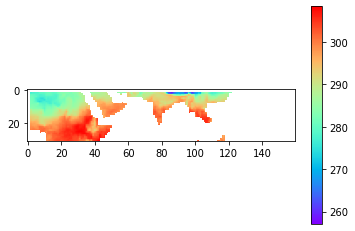

In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = ds[["variable"]].to_array()
u = data[0, 0, :, :]
B = np.where(u==-999, np.nan, u)
plt.imshow(B, cmap = "rainbow")
plt.colorbar()